In [1]:
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import pysal as ps
import mplleaflet
import geopandas as gpd
import json
import pandas as pd
import statsmodels.api as sm
import pylab as plt
import statsmodels.formula.api as smf
from mpl_toolkits.basemap import Basemap
import os
s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [3]:
data = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
data1 = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')

In [4]:
l = []
for i in range(20):
    n='df'+str(i)
    l.append(n)

In [5]:
import zipfile
k=0
for i in range(94,100):
        if k<6:
            
            fname = 'zbp'+str(i)+'totals.zip'
            zf = zipfile.ZipFile(fname)
            name = 'df'+str(k)
            our_text_file = zf.open('zbp'+str(i)+'totals.txt')
            globals()[name] = pd.read_csv(our_text_file)
            
            k=k+1
            
    
for i in range(0,11):
         if k>=6 and k<16:   
            #print i
            fname = 'zbp0'+str(i)+'totals.zip'
            zf = zipfile.ZipFile(fname)
            #l_z = zf.namelist()
            #print l and see which file to open
            name = 'df'+str(k)
            our_text_file = zf.open('zbp0'+str(i)+'totals.txt')
            globals()[name] = pd.read_csv(our_text_file)
            k=k+1
            #print k
    
for i in range(0,4):
        if k>=16:
            fname = 'zbp1'+str(i)+'totals.zip'
            zf = zipfile.ZipFile(fname)
            #l_z = zf.namelist()
            #print l and see which file to open
            name = 'df'+str(k)
            our_text_file = zf.open('zbp1'+str(i)+'totals.txt')
            globals()[name] = pd.read_csv(our_text_file)
            
            k=k+1
        

In [6]:
f = df0[(df0['zip']>10000) & (df0['zip']<11692)]


In [7]:
geod = pd.DataFrame({'zip':data['postalCode'].astype(float)}).drop_duplicates()
d2 = geod

In [8]:
for i in range(20):
    
    name = 'data'+str(i)
    name_c = 'df'+str(i)
    df = globals()[name_c]
    if (i>3) and (i<9):  
        df = df[['ZIP','EST']]
        df.columns = ['zip','est'+str(i)]
        df = pd.merge(geod,df,on='zip')
    else :
        df = df[['zip','est']]
        df.columns = ['zip','est'+str(i)]
        df = pd.merge(geod,df,on='zip')
    globals()[name] = df
    d2['est'+str(i)] = df['est'+str(i)]



In [9]:
np.shape(d2)

(247, 21)

In [10]:
d2_array = d2.as_matrix()

In [11]:
d2.columns

Index([u'zip', u'est0', u'est1', u'est2', u'est3', u'est4', u'est5', u'est6',
       u'est7', u'est8', u'est9', u'est10', u'est11', u'est12', u'est13',
       u'est14', u'est15', u'est16', u'est17', u'est18', u'est19'],
      dtype='object')

In [12]:
badindex = []
for i,est in enumerate(d2_array):
    if np.isnan(est).any():
        badindex.append(i)
        
clean_est = np.delete(d2_array, badindex, 0)

In [13]:
np.shape(clean_est)

(224, 21)

In [14]:
y=range(1994,2014)

([<matplotlib.axis.XTick at 0x11c640110>,
 <a list of 20 Text xticklabel objects>)

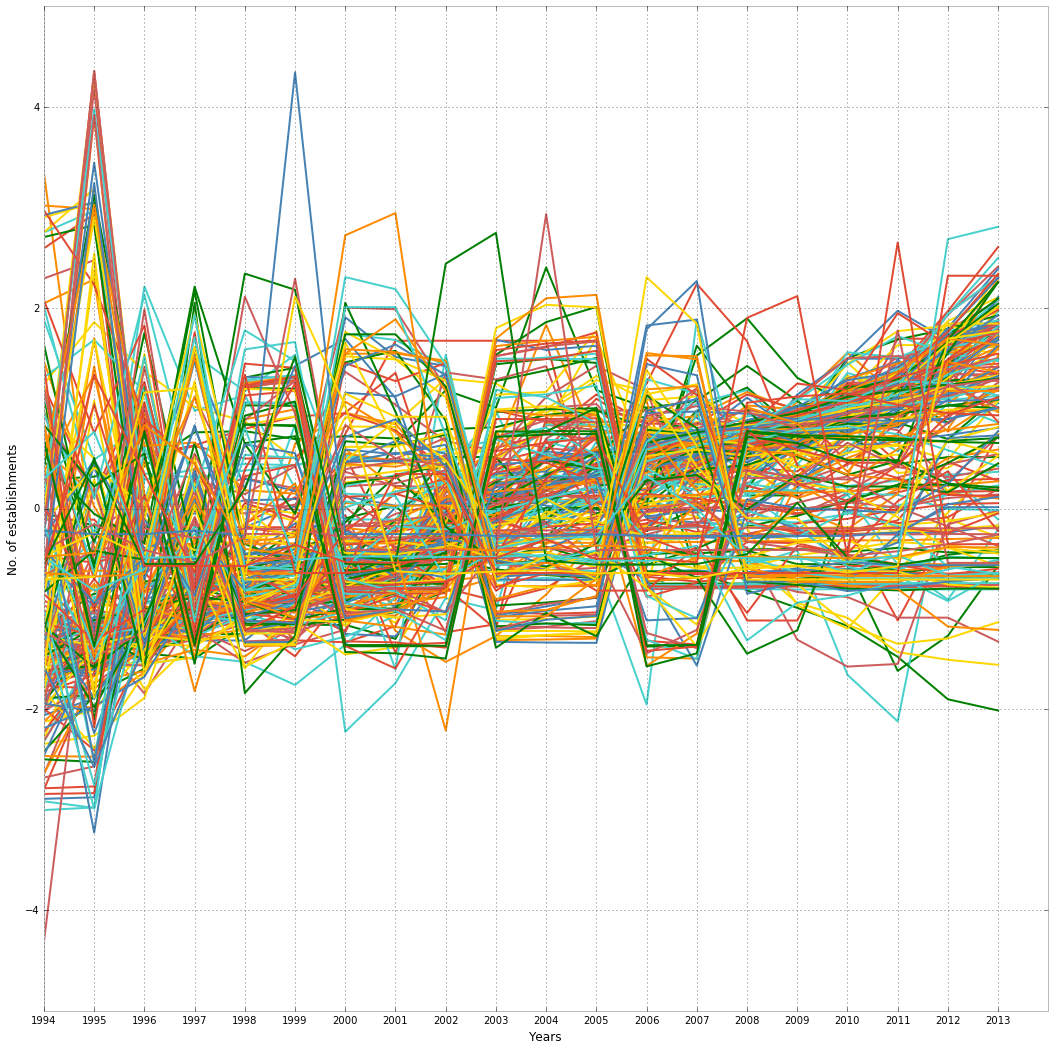

In [15]:
plt.figure(figsize=(18, 18), dpi=200)
cl,z,s = [],[],[]
for i in range(224):
    nd = clean_est[i][1:]
    z.append(clean_est[i][0])
    s.append(nd)
    nd_mean = np.mean(clean_est[i][1:])
    nd_std = np.std(clean_est[i][1:])
    for i in range(len(nd)):
        nd[i] = (nd[i]-nd_mean)/nd_std
    plt.plot(range(20),nd)
    cl.append(nd)
    clean_est[i][1:] = nd   
plt.xlabel('Years')
plt.ylabel('No. of establishments')
plt.xticks(range(20),y)

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


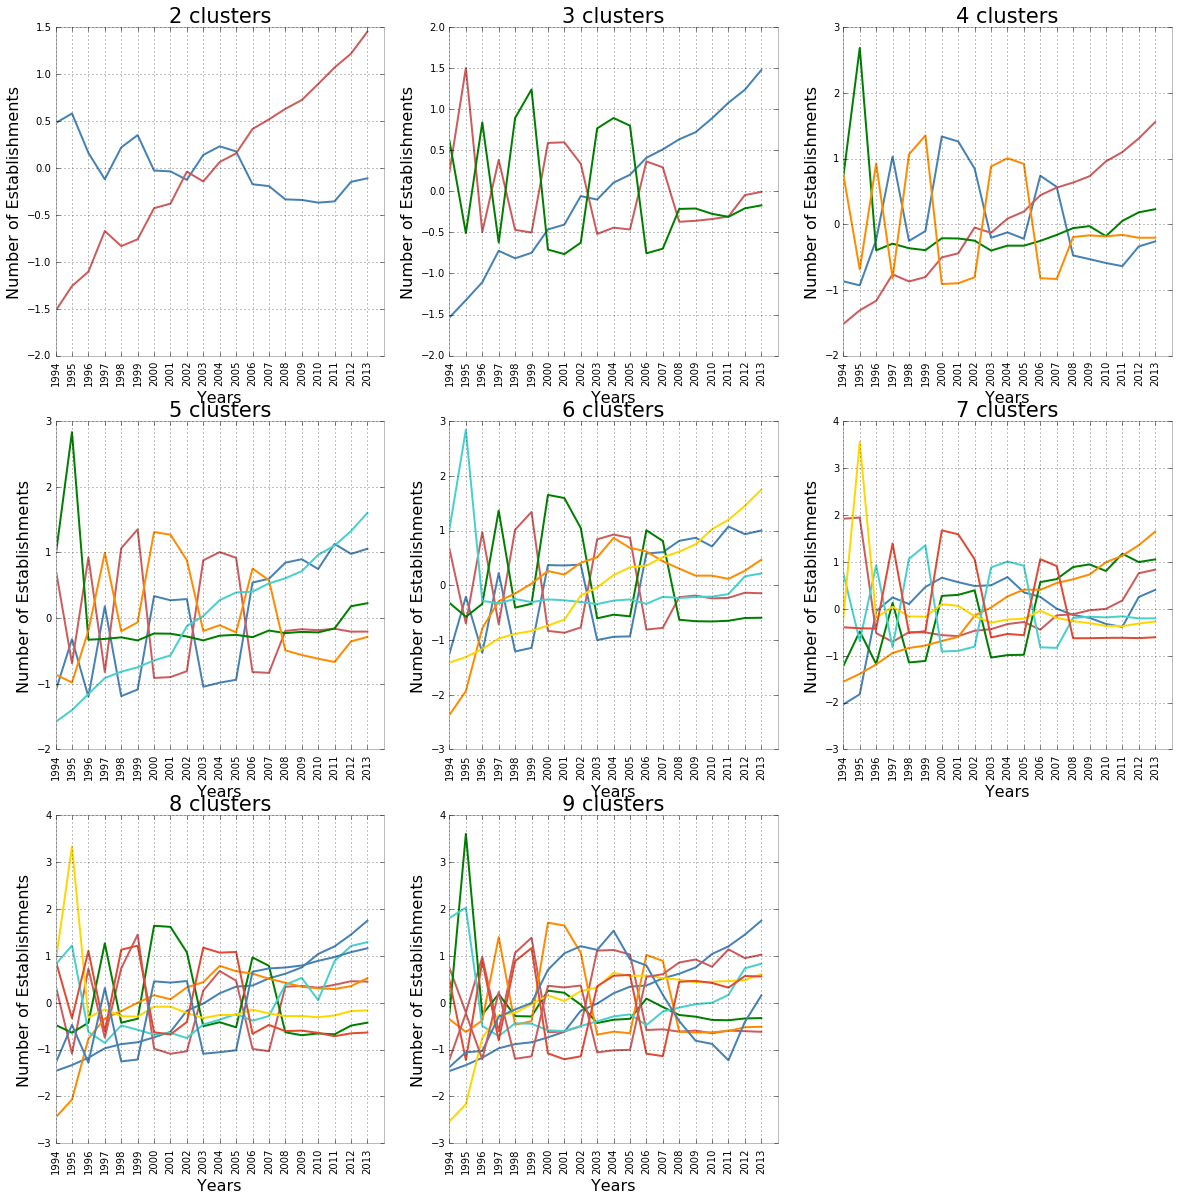

In [16]:
from sklearn.cluster import k_means
plt.figure(figsize=(20, 20))

p = 1
for i in range(2,10):

    est=k_means(s,n_clusters = i)
    plt.subplot(3, 3, p)
    p += 1
    plt.plot(range(20), np.transpose(est[0]))
    plt.title(str(i)+' clusters', fontsize = 21)
    plt.ylabel('Number of Establishments', fontsize = 16)
    plt.xlabel('Years', fontsize = 16)
    plt.xticks(range(20), range(1994,2014), rotation = 90);
    plt.legend()

In [17]:
with_zip=pd.DataFrame()
with_zip['zip'] = z

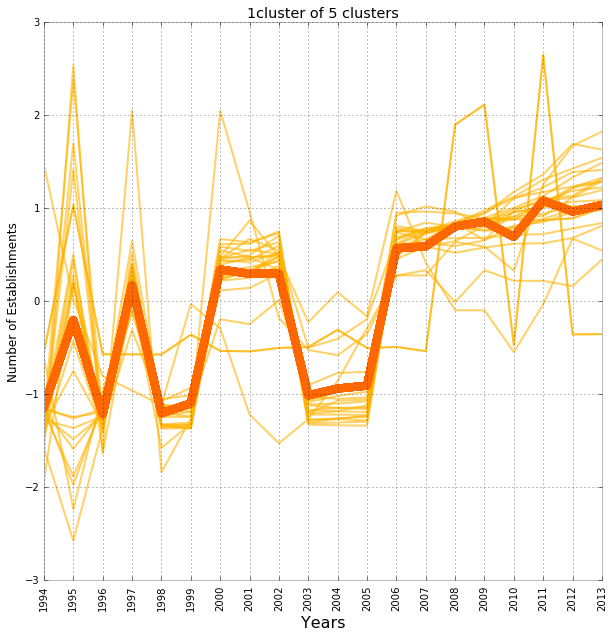

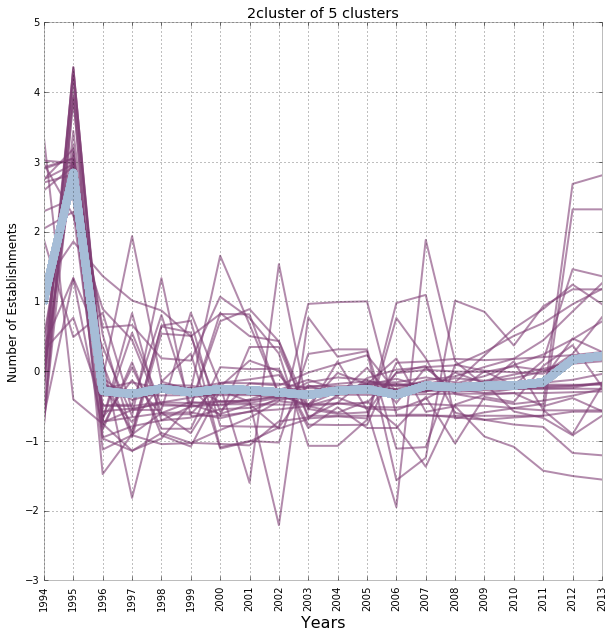

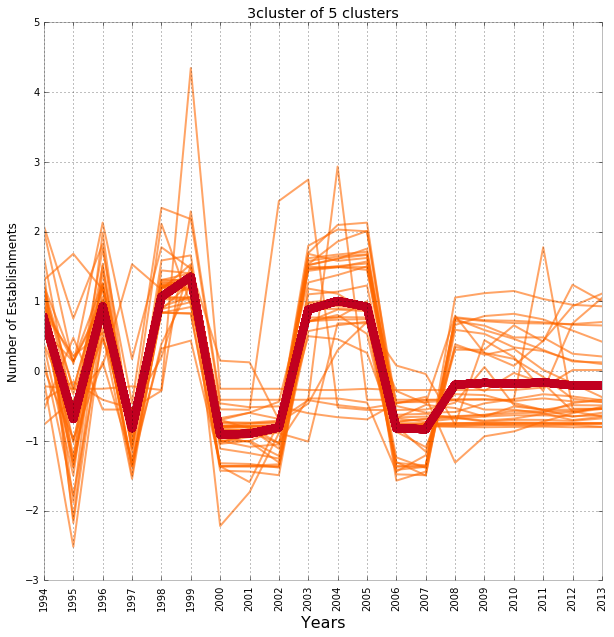

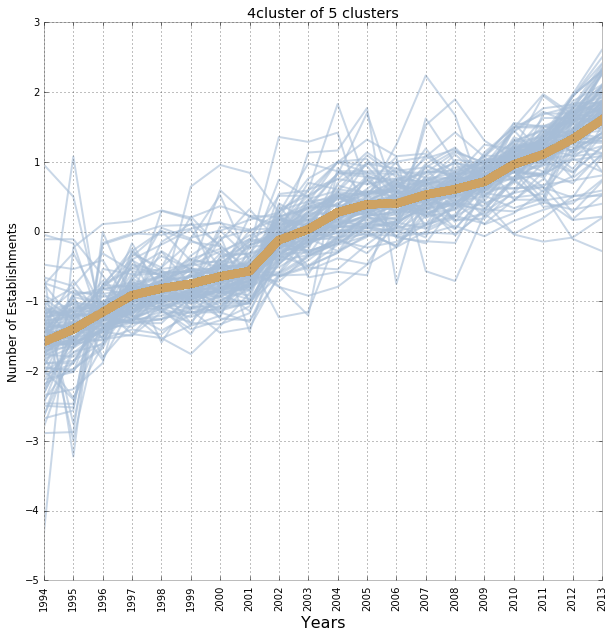

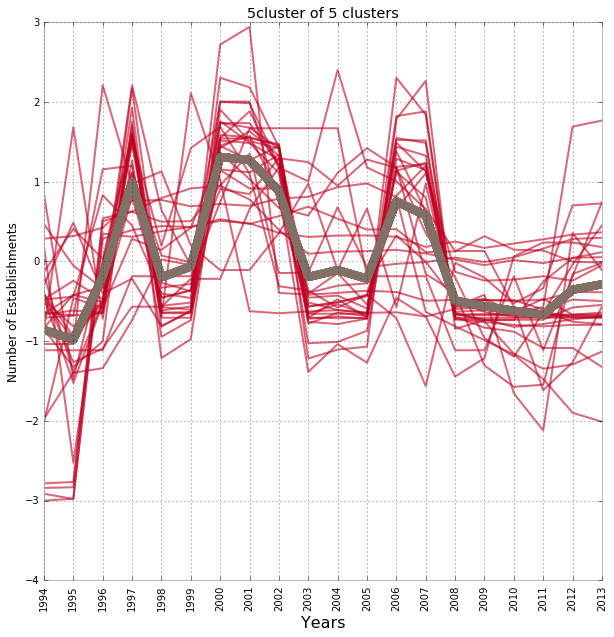

In [18]:
#cl = cluster_array
with_zip['cluster'] = est[1]
c = k_means(cl,n_clusters=5)
i = 0

for m in range(5):
    i = 0
    fig0 = plt.figure(figsize=(10,10));
    ax0 = fig0.add_subplot(1,1,1);
    plt.ylabel('Number of Establishments')
    plt.xlabel('Years', fontsize = 16)
    plt.title(str(m+1)+'cluster of 5 clusters')
    plt.xticks(range(20), y, rotation = 90);
    for k in c[1]:
        if k==m:
            ax0.plot(range(20),cl[i],c=kelly_colors_hex[m],alpha=0.6)
            ax0.plot(range(20),c[0][k],c=kelly_colors_hex[m+2],lw=8)
        i = i+1
        


In [19]:
data['zip'] = data['postalCode'].astype(float)
geo = data.join(with_zip,rsuffix='zip',how='inner')

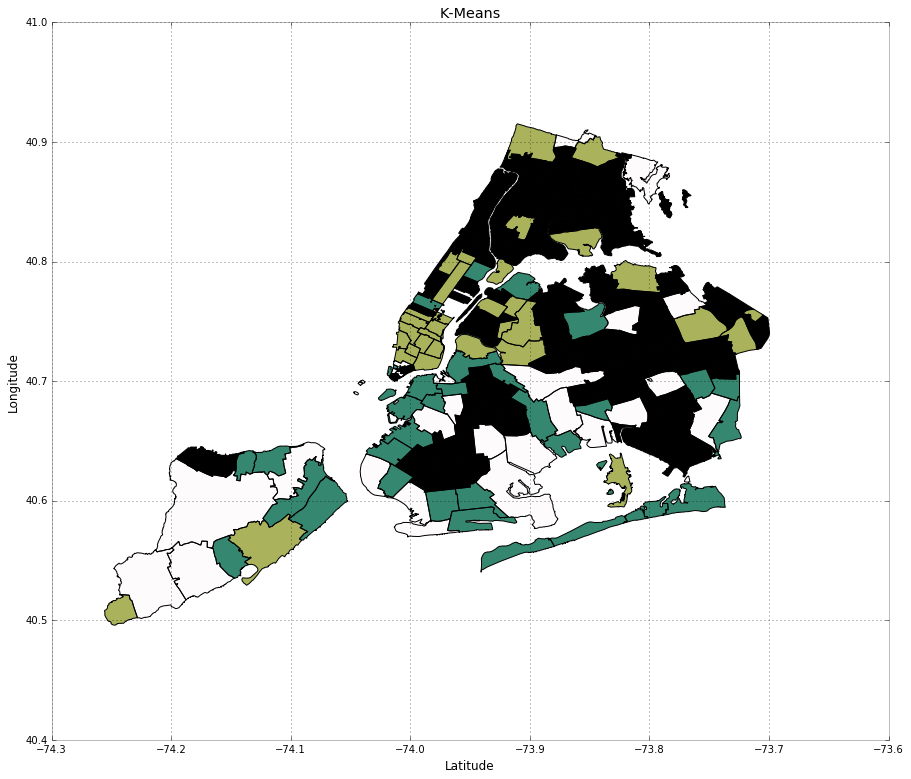

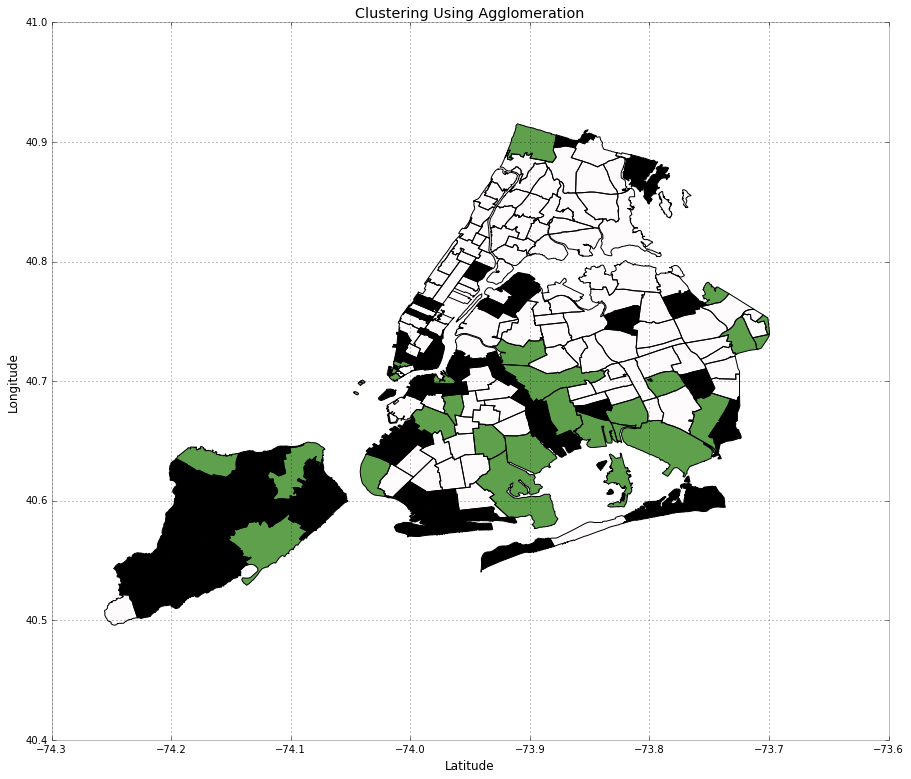

In [20]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5, compute_full_tree=True).fit(s)
geo.plot(column='cluster', scheme='QUANTILES', alpha=1, colormap='gist_earth',figsize=(15,15))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-Means')

with_zip['cluster2'] = agc.labels_
data['zip'] = data['postalCode'].astype(float)
geo1 = data.join(with_zip,rsuffix='zip',how='inner')
geo1.plot(column='cluster2', scheme='QUANTILES', alpha=1, colormap='gist_earth',figsize=(15,15))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering Using Agglomeration')

###Both clusters shows different trends for example large extablishments in staten island in algomerative algorithm ann no clustring with white area in staten island hrough K means. 
###Due to variation it is hard to justify which clustering method is better.